# Exercise - Black's Formula for Options on Futures

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

### Data

In this exercise, we use Black's formula to price options on futures contracts.
* `option_data_bb_SFRZ5.xlsx` - market data on SOFR 3-month futures, and its option chain.

# 1. SOFR Futures Options

In [5]:
import pandas as pd

In [6]:
import pandas as pd

FILEDATA = "option_data_bb_SFRZ5.xlsx"
SHEETNAME = 'spot'
spot = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).rename(columns={'Unnamed: 0': 'field'}).set_index('field')
display(spot)

,SFRZ5 Comdty
field,
name,3 MONTH SOFR FUT Dec25
last update date,2025-07-29 00:00:00
last update time,10:03:48
price,96.085
hist vol 30d,0.006851
hist vol 60d,0.007595
volume,150071


In [7]:
EXPRY_CHAIN_LOC = 1
SHEETNAME = pd.ExcelFile(FILEDATA).sheet_names[EXPRY_CHAIN_LOC]
options = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).set_index('ticker')
display(options.loc[options['option type'].str.contains('C')])
display(options.loc[options['option type'].str.contains('P')])

,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5C 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.7500,0.3300,0.04396,-0.0050,...,0.899011,0.028984,0.002962,-0.000265,0.3350,0.350,51,51,10703,NaN
SFRV5C 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8125,0.2775,0.04396,0.0050,...,0.847946,0.037543,0.003990,-0.000369,0.2850,0.295,120,333,0,NaN
SFRV5C 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8750,0.2325,0.04396,0.0225,...,0.768768,0.045176,0.005212,-0.000524,0.2350,0.245,14976,119,20020,NaN
SFRV5C 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.9375,0.1950,0.04396,0.0475,...,0.679044,0.049114,0.006161,-0.000676,0.1950,0.205,15838,248,7013,NaN
SFRV5C 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0000,0.1600,0.04396,0.0750,...,0.589523,0.049138,0.006712,-0.000805,0.1600,0.175,7500,19302,15635,NaN
SFRV5C 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0625,0.1300,0.04396,0.1075,...,0.506743,0.047811,0.006902,-0.000892,0.1350,0.145,100,36274,31106,3882.0
SFRV5C 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.1250,0.1050,0.04396,0.1050,...,0.430860,0.046676,0.006811,-0.000887,0.1050,0.115,37066,8327,43461,2500.0
SFRV5C 96.1875 Comdty,2025-07-29,08:33:45,73,C,AMER,2500,96.1875,0.0850,0.04396,0.0850,...,0.360056,0.043005,0.006494,-0.000875,0.0800,0.095,56885,48479,76938,2698.0
SFRV5C 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.2500,0.0675,0.04396,0.0675,...,0.297882,0.038291,0.006022,-0.000844,0.0650,0.075,46199,27485,72563,9950.0


,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5P 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.7500,0.0075,0.04396,0.0075,...,-0.076812,0.025414,0.002511,-0.000220,0.0050,0.010,25297,11208,57342,2550.0
SFRV5P 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8125,0.0175,0.04396,0.0175,...,-0.138375,0.036404,0.003844,-0.000361,0.0125,0.020,50328,39390,18597,NaN
SFRV5P 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8750,0.0350,0.04396,0.0350,...,-0.219462,0.045113,0.005143,-0.000522,0.0275,0.035,40887,8311,50736,5225.0
SFRV5P 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.9375,0.0575,0.04396,0.0575,...,-0.313520,0.049041,0.006158,-0.000689,0.0500,0.060,33397,49762,18828,NaN
SFRV5P 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0000,0.0850,0.04396,0.0850,...,-0.398240,0.051125,0.006694,-0.000782,0.0750,0.085,53974,758,62162,1000.0
SFRV5P 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0625,0.1175,0.04396,0.1175,...,-0.483743,0.048766,0.006901,-0.000871,0.1100,0.120,1197,40350,11505,3286.0
SFRV5P 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1250,0.1550,0.04396,0.1150,...,-0.560378,0.046505,0.006812,-0.000895,0.1450,0.155,867,34387,63551,NaN
SFRV5P 96.1875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1875,0.1950,0.04396,0.0925,...,-0.634074,0.043781,0.006484,-0.000842,0.1850,0.195,353,22485,14955,NaN
SFRV5P 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.2500,0.2425,0.04396,0.0775,...,-0.698355,0.038957,0.005992,-0.000807,0.2300,0.240,238,17500,13145,NaN


### 1.1.

Use Black's Formula to price the **call option**
* at the nearest expiration
* using the ATM strike (strike nearest the spot)
* using the implied vol provided in the data
* using the finance rate as the discount rate

How close is your estimate to the market quote?

In [17]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm

c = options
req = ['option type','strike price','implied vol','days to expiration','finance rate','bid','ask']
miss = [x for x in req if x not in c.columns]
if miss:
    raise KeyError(miss)

F = float(spot.at['price', spot.columns[0]])
R = 100.0 - F
T = float(pd.to_numeric(c['days to expiration'], errors='coerce').dropna().iloc[0]) / 365.0
r = float(pd.to_numeric(c['finance rate'], errors='coerce').dropna().iloc[0])
r = r / 100.0 if r > 1.5 else r
DF = math.exp(-r * T)

cc = c.loc[c['option type'].astype(str).str.upper().str.contains('C'), ['strike price','implied vol','bid','ask']].copy()
cc = cc.apply(pd.to_numeric, errors='coerce')
cc['mid'] = 0.5 * (cc['bid'] + cc['ask'])

tk = (cc['strike price'] - F).abs().idxmin()
K = float(cc.loc[[tk], 'strike price'].iloc[0])
sig = float(cc.loc[[tk], 'implied vol'].iloc[0])
sig = sig / 100.0 if sig > 1.5 else sig
sig = sig * (R / F)
mkt = float(cc.loc[[tk], 'mid'].iloc[0])

d1 = (math.log(F / K) + 0.5 * sig * sig * T) / (sig * math.sqrt(T))
d2 = d1 - sig * math.sqrt(T)
blk = DF * (F * norm.cdf(d1) - K * norm.cdf(d2))

display(pd.DataFrame({'F0':[F],'K_atm':[K],'sigma_price':[sig],'T':[T],'r':[r],'Black_call':[blk],'Market_mid':[mkt],'Abs_diff':[blk-mkt],'Pct_diff':[blk/mkt-1 if mkt else np.nan]}, index=[tk]))

,F0,K_atm,sigma_price,T,r,Black_call,Market_mid,Abs_diff,Pct_diff
SFRV5C 96.0625 Comdty,96.085,96.0625,0.007556,0.2,0.04396,0.139836,0.14,-0.000164,-0.001169


### 1.2.

Value the entire strike chain for the nearest expiration.
* Use the provided implied vol for each strike.

Plot the Black values against the market values.

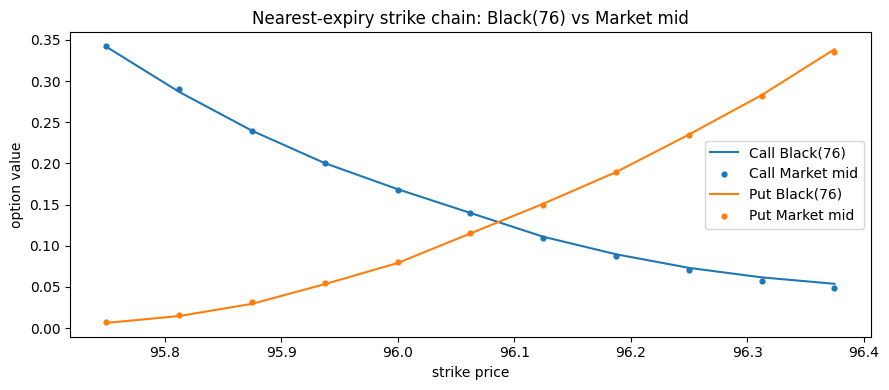

,option type,strike price,implied vol,mid,black
ticker,,,,,
SFRV5C 95.75 Comdty,C,95.7500,0.140374,0.34250,0.341686
SFRV5C 95.8125 Comdty,C,95.8125,0.141465,0.29000,0.286879
SFRV5C 95.875 Comdty,C,95.8750,0.150695,0.24000,0.239743
SFRV5C 95.9375 Comdty,C,95.9375,0.162524,0.20000,0.200343
SFRV5C 96 Comdty,C,96.0000,0.176306,0.16750,0.168744
SFRV5C 96.0625 Comdty,C,96.0625,0.185438,0.14000,0.139836
SFRV5C 96.125 Comdty,C,96.1250,0.187461,0.11000,0.110957
SFRV5C 96.1875 Comdty,C,96.1875,0.193992,0.08750,0.089651
SFRV5C 96.25 Comdty,C,96.2500,0.202020,0.07000,0.073152


In [18]:
import matplotlib.pyplot as plt

c = options
req = ['option type','strike price','implied vol','days to expiration','finance rate','bid','ask']
miss = [x for x in req if x not in c.columns]
if miss:
    raise KeyError(miss)

F = float(spot.at['price', spot.columns[0]])
R = 100.0 - F
df = c[req].copy()
df[['strike price','implied vol','days to expiration','finance rate','bid','ask']] = df[['strike price','implied vol','days to expiration','finance rate','bid','ask']].apply(pd.to_numeric, errors='coerce')
df['mid'] = 0.5 * (df['bid'] + df['ask'])

K = df['strike price'].to_numpy()
sig = df['implied vol'].to_numpy()
sig = np.where(sig > 1.5, sig / 100.0, sig)
sig = sig * (R / F)
T = df['days to expiration'].to_numpy() / 365.0
r = df['finance rate'].to_numpy()
r = np.where(r > 1.5, r / 100.0, r)
DF = np.exp(-r * T)
d1 = (np.log(F / K) + 0.5 * sig * sig * T) / (sig * np.sqrt(T))
d2 = d1 - sig * np.sqrt(T)

isC = df['option type'].astype(str).str.upper().str.contains('C').to_numpy()
isP = df['option type'].astype(str).str.upper().str.contains('P').to_numpy()
black = np.full(len(df), np.nan)
black[isC] = DF[isC] * (F * norm.cdf(d1[isC]) - K[isC] * norm.cdf(d2[isC]))
black[isP] = DF[isP] * (K[isP] * norm.cdf(-d2[isP]) - F * norm.cdf(-d1[isP]))
df['black'] = black

calls = df.loc[isC, ['strike price','mid','black']].dropna().sort_values('strike price')
puts = df.loc[isP, ['strike price','mid','black']].dropna().sort_values('strike price')

plt.figure(figsize=(9,4))
if len(calls):
    plt.plot(calls['strike price'], calls['black'], label='Call Black(76)')
    plt.scatter(calls['strike price'], calls['mid'], s=12, label='Call Market mid')
if len(puts):
    plt.plot(puts['strike price'], puts['black'], label='Put Black(76)')
    plt.scatter(puts['strike price'], puts['mid'], s=12, label='Put Market mid')
plt.title('Nearest-expiry strike chain: Black(76) vs Market mid')
plt.xlabel('strike price')
plt.ylabel('option value')
plt.legend()
plt.tight_layout()
plt.show()

display(df[['option type','strike price','implied vol','mid','black']].dropna().sort_values(['option type','strike price']).head(12))

### 1.3. 

What are a few reasons that Black's value doesn't match the market value?

How significant is the American nature of the exercise?

Small gaps between Black(76) values and market quotes can remain due to (i) microstructure effects such as bid–ask spreads and using mid quotes that may differ from executable prices, (ii) model misspecification—Black assumes lognormal dynamics and a constant volatility over the life of the option, while real markets exhibit smiles/skews, fat tails, and time‑varying volatility, and (iii)the American nature of the exercise.
According to the graph, the difference bewteen Black's value and the market value is fairly small, so the significance is low.

### 1.4.

How is implied vol being quoted? As in, does it reflect units of vol of percent changes in the SOFR rate? Or day-over-day differences? Or something else?

Use the data in `ref_rates.xlsx` to calculate the historic 60-day rolling volatility of the SOFR rate.

In this dataset, the implied volatility appears to be quoted as the volatility of percentage changes in the SOFR rate, as the modeling based on that assumption gives out pretty close outcomes.

,date,SOFR,vol60_diff_ann,vol60_pct_ann
2907,2025-12-17,3.69,1.093440,0.268518
2908,2025-12-18,3.66,1.094290,0.268805
2909,2025-12-19,3.66,1.094120,0.268763
2912,2025-12-22,3.68,1.095002,0.269041
2913,2025-12-23,3.66,1.088681,0.267572
2914,2025-12-24,3.66,1.088563,0.267544
2916,2025-12-26,3.76,1.109905,0.273950
2919,2025-12-29,3.77,1.083815,0.267803
2920,2025-12-30,3.71,1.087120,0.268917
2921,2025-12-31,3.87,1.140400,0.284317


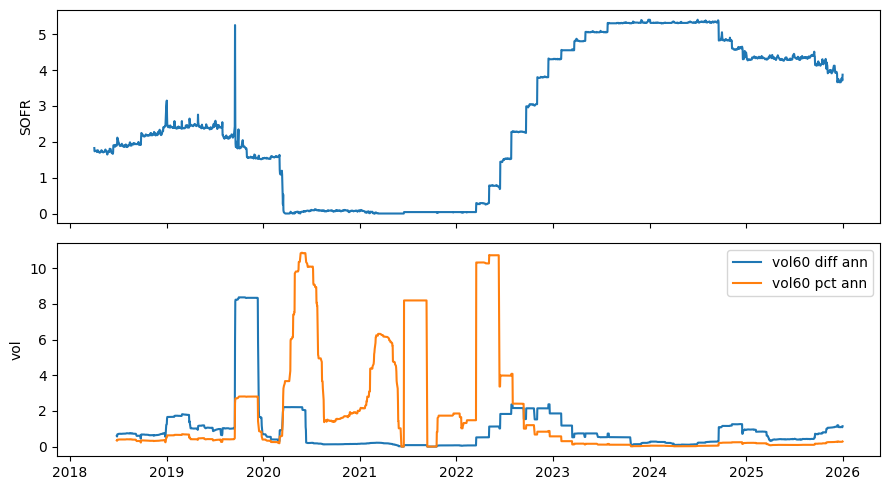

In [21]:
import matplotlib.pyplot as plt

rr = pd.read_excel('ref_rates.xlsx', sheet_name='data')[['date','SOFR']].dropna()
rr['date'] = pd.to_datetime(rr['date'])
rr['SOFR'] = pd.to_numeric(rr['SOFR'], errors='coerce')
rr = rr.dropna().sort_values('date')
x = rr['SOFR']
out = rr.assign(vol60_diff_ann=x.diff().rolling(60).std() * np.sqrt(252), vol60_pct_ann=x.pct_change().rolling(60).std() * np.sqrt(252))
display(out.tail(10))

fig, ax = plt.subplots(2, 1, figsize=(9, 5), sharex=True)
ax[0].plot(out['date'], out['SOFR'])
ax[0].set_ylabel('SOFR')
ax[1].plot(out['date'], out['vol60_diff_ann'], label='vol60 diff ann')
ax[1].plot(out['date'], out['vol60_pct_ann'], label='vol60 pct ann')
ax[1].set_ylabel('vol')
ax[1].legend()
plt.tight_layout()
plt.show()

### 1.5.

Plot the open interest across strikes. 

Report the total notional open interest across the chain for this expiration.

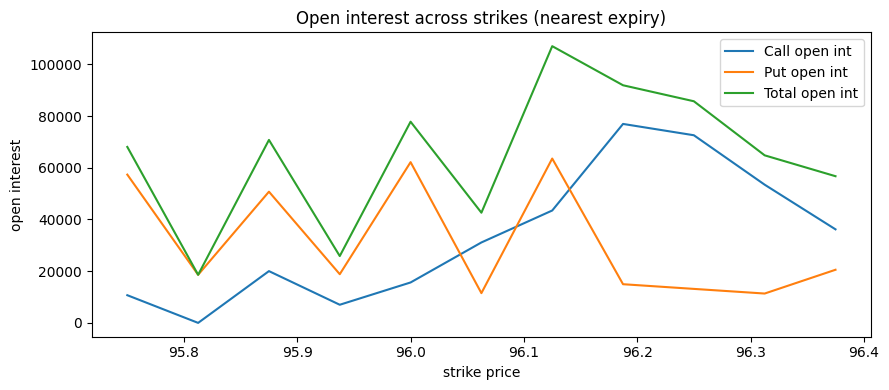

,total_open_int,contract_size,total_notional_open_interest
0,709775.0,2500.0,1.774438e+09


cp,strike price,C,P,Total
6,96.1250,43461,63551,107012
7,96.1875,76938,14955,91893
8,96.2500,72563,13145,85708
4,96.0000,15635,62162,77797
2,95.8750,20020,50736,70756
0,95.7500,10703,57342,68045
9,96.3125,53442,11350,64792
10,96.3750,36179,20544,56723
5,96.0625,31106,11505,42611
3,95.9375,7013,18828,25841


In [22]:
import matplotlib.pyplot as plt

c = options
req = ['option type','strike price','open int','option contract size']
miss = [x for x in req if x not in c.columns]
if miss:
    raise KeyError(miss)

df = c[req].copy()
df[['strike price','open int','option contract size']] = df[['strike price','open int','option contract size']].apply(pd.to_numeric, errors='coerce')
df['open int'] = df['open int'].fillna(0)
df['cp'] = df['option type'].astype(str).str.upper().str[0]
df = df.loc[df['cp'].isin(['C','P'])]
df['notional_oi'] = df['open int'] * df['option contract size']

agg = df.pivot_table(index='strike price', columns='cp', values='open int', aggfunc='sum').fillna(0).sort_index()
if 'C' not in agg.columns:
    agg['C'] = 0.0
if 'P' not in agg.columns:
    agg['P'] = 0.0
agg['Total'] = agg['C'] + agg['P']

plt.figure(figsize=(9,4))
plt.plot(agg.index, agg['C'], label='Call open int')
plt.plot(agg.index, agg['P'], label='Put open int')
plt.plot(agg.index, agg['Total'], label='Total open int')
plt.xlabel('strike price')
plt.ylabel('open interest')
plt.title('Open interest across strikes (nearest expiry)')
plt.legend()
plt.tight_layout()
plt.show()

total_notional = float(df['notional_oi'].sum())
display(pd.DataFrame({'total_open_int':[float(df['open int'].sum())],'contract_size':[float(df['option contract size'].dropna().iloc[0])],'total_notional_open_interest':[total_notional]}))
display(agg.reset_index().sort_values('Total', ascending=False).head(10))